In [1]:
# Se da acceso al drive desde Colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Se importan las dependencias y librerías necesarias
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

from IPython import display

In [3]:
# Se crea una función que cargo los archivos de audio y genera un vector en 
# numpy con las muestras del mismo
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
   # sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
   # wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

(16000,)


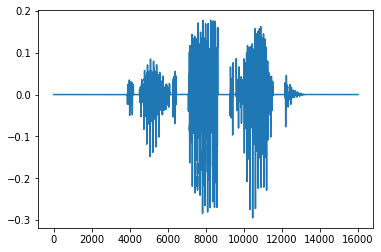

In [4]:
# Ejemplo de carga de un archivo
RutaFile="/content/gdrive/MyDrive/Colab Notebooks/Datos/Comandos/Arriba1.wav"
wave = load_wav_16k_mono(RutaFile)
print(wave.shape)
plt.plot(wave)
plt.show()



In [5]:
# Se define una función que con las muestras del archivo de audio, genera el 
# espectograma
def preprocess(wave): 
    #wav = wave[:32000]
    wav = wave[:16000]
    #zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
   # wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=255, frame_step=128)
    spectrogram = tf.abs(spectrogram)
    return spectrogram

In [6]:
# Ejemplo de la creación de un espectrograma
espectrograma= preprocess(wave)
print('Waveform shape:', wave.shape)
print('Spectrogram shape:', espectrograma.shape)
print('Audio playback')
display.display(display.Audio(wave, rate=16000))

Waveform shape: (16000,)
Spectrogram shape: (124, 129)
Audio playback


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


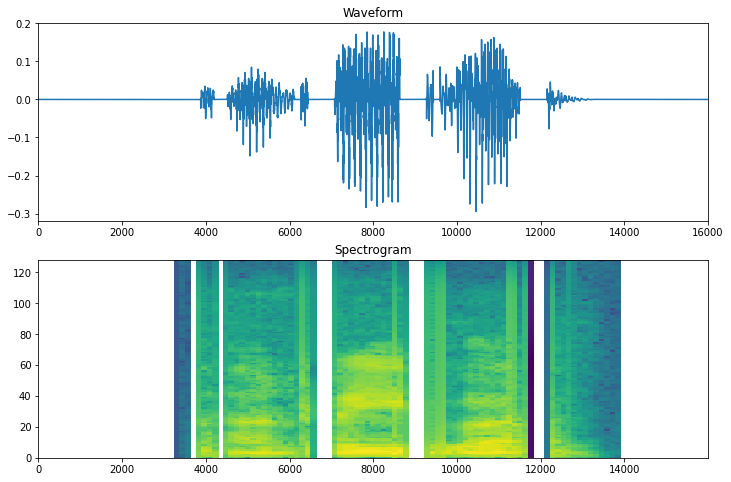

In [7]:
# Se define una función que permite graficar el espectrograma
def plot_spectrogram(espectrograma, ax):
  # Convert to frequencies to log scale and transpose so that the time is
  # represented in the x-axis (columns).
  log_spec = np.log(espectrograma.T)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(espectrograma), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)


fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(wave.shape[0])
axes[0].plot(timescale, wave.numpy())
axes[0].set_title('Waveform')
#axes[0].set_xlim([0, 32000])
axes[0].set_xlim([0, 16000])
plot_spectrogram(espectrograma.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

In [8]:
# Se cargan los diferentes archivos  de audio que se van a usar en el proceso
# de entrenamiento y se genera el espectrograma de cada uno de ellos

RutaFile="/content/gdrive/MyDrive/Colab Notebooks/Datos/Comandos/Arriba1.wav"
wave1a = load_wav_16k_mono(RutaFile)
espectrograma1a= preprocess(wave1a)

RutaFile="/content/gdrive/MyDrive/Colab Notebooks/Datos/Comandos/Arriba2.wav"
wave1b = load_wav_16k_mono(RutaFile)
espectrograma1b= preprocess(wave1b)

RutaFile="/content/gdrive/MyDrive/Colab Notebooks/Datos/Comandos/Arriba3.wav"
wave1c = load_wav_16k_mono(RutaFile)
espectrograma1c= preprocess(wave1c)

RutaFile="/content/gdrive/MyDrive/Colab Notebooks/Datos/Comandos/Arriba4.wav"
wave1d = load_wav_16k_mono(RutaFile)
espectrograma1d= preprocess(wave1d)

RutaFile="/content/gdrive/MyDrive/Colab Notebooks/Datos/Comandos/Derecha1.wav"
wave2a = load_wav_16k_mono(RutaFile)
espectrograma2a= preprocess(wave2a)

RutaFile="/content/gdrive/MyDrive/Colab Notebooks/Datos/Comandos/Derecha2.wav"
wave2b = load_wav_16k_mono(RutaFile)
espectrograma2b= preprocess(wave2b)

RutaFile="/content/gdrive/MyDrive/Colab Notebooks/Datos/Comandos/Derecha3.wav"
wave2c = load_wav_16k_mono(RutaFile)
espectrograma2c= preprocess(wave2c)

RutaFile="/content/gdrive/MyDrive/Colab Notebooks/Datos/Comandos/Derecha4.wav"
wave2d = load_wav_16k_mono(RutaFile)
espectrograma2d= preprocess(wave2d)

RutaFile="/content/gdrive/MyDrive/Colab Notebooks/Datos/Comandos/Izquierda1.wav"
wave3a = load_wav_16k_mono(RutaFile)
espectrograma3a= preprocess(wave3a)

RutaFile="/content/gdrive/MyDrive/Colab Notebooks/Datos/Comandos/Izquierda2.wav"
wave3b = load_wav_16k_mono(RutaFile)
espectrograma3b= preprocess(wave3b)

RutaFile="/content/gdrive/MyDrive/Colab Notebooks/Datos/Comandos/Izquierda3.wav"
wave3c = load_wav_16k_mono(RutaFile)
espectrograma3c= preprocess(wave3c)

RutaFile="/content/gdrive/MyDrive/Colab Notebooks/Datos/Comandos/Izquierda4.wav"
wave3d = load_wav_16k_mono(RutaFile)
espectrograma3d= preprocess(wave3d)

# Se almacena todos los espectogramas en una varible
Datos=np.zeros((12,124,129))
Datos[0,:,:]=espectrograma1a
Datos[1,:,:]=espectrograma1b
Datos[2,:,:]=espectrograma1c
Datos[3,:,:]=espectrograma1d
Datos[4,:,:]=espectrograma2a
Datos[5,:,:]=espectrograma2b
Datos[6,:,:]=espectrograma2c
Datos[7,:,:]=espectrograma2d
Datos[8,:,:]=espectrograma3a
Datos[9,:,:]=espectrograma3b
Datos[10,:,:]=espectrograma3c
Datos[11,:,:]=espectrograma3d

# Se expande la variable que contiene los espectrogramas para que puede ser 
# procesada por el modelo neuronal
print(Datos.shape)
Xtrain=tf.expand_dims(Datos, axis=3)
print(Xtrain.shape)

(12, 124, 129)
(12, 124, 129, 1)


In [9]:
# Se definen las etiquetas para la salida del modelo
YtrainIni=np.zeros((12,1))
for i in range(4):
    YtrainIni[i]=0

for i in range(4,8):
    YtrainIni[i]=1

for i in range(8,12):
    YtrainIni[i]=2

print(YtrainIni)

[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]]


In [10]:
# Se convierten las etiquetas a codificación "one hot" que es la 
# usará el modelo
Ytrain= keras.utils.to_categorical(YtrainIni)
print(Ytrain)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 124, 129, 8)       80        
                                                                 
 conv2d_5 (Conv2D)           (None, 124, 129, 16)      1168      
                                                                 
 conv2d_6 (Conv2D)           (None, 124, 129, 32)      4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 124, 129, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 65, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 257920)            0         
                                                      

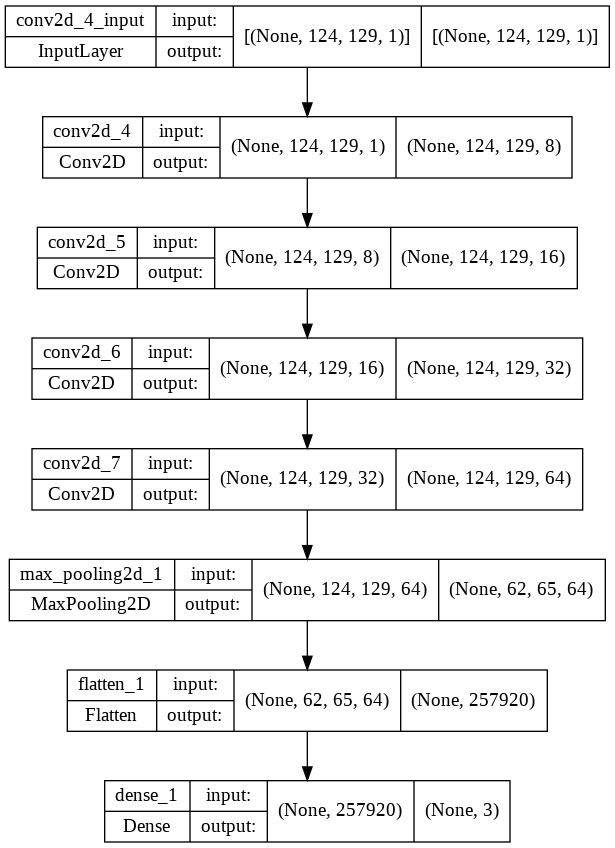

In [20]:
# Se crea el modelo secuencial en Keras con capas convolucionales 2D
# y una capa clasificador densa tipo softmax
modelo = keras.models.Sequential()
modelo.add(keras.layers.Conv2D(8, 3, activation="relu",padding="same", input_shape=(124,129,1)))
modelo.add(keras.layers.Conv2D(16, 3, activation="relu",padding="same"))
modelo.add(keras.layers.Conv2D(32, 3, activation="relu",padding="same"))
modelo.add(keras.layers.Conv2D(64, 3, activation="relu",padding="same"))
modelo.add(keras.layers.MaxPooling2D(pool_size=2,strides=2, padding='same'))
modelo.add(keras.layers.Flatten())
modelo.add(keras.layers.Dense(3, activation = 'softmax'))
# Se muestra el resumen de la arquitectura del modelo
modelo.summary()
# Se muestra un esquema del modelo
keras.utils.plot_model(modelo, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [21]:
# Se compila el modelo y entrena el modelo
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
historia = modelo.fit(Xtrain,Ytrain, epochs=30,batch_size=None)


Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 1.1077 - accuracy: 0.1667
Epoch 2/30
1/1 [==============================] - 1s 837ms/step - loss: 0.5947 - accuracy: 1.0000
Epoch 3/30
1/1 [==============================] - 1s 858ms/step - loss: 0.2340 - accuracy: 1.0000
Epoch 4/30
1/1 [==============================] - 1s 846ms/step - loss: 0.0516 - accuracy: 1.0000
Epoch 5/30
1/1 [==============================] - 1s 869ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 6/30
1/1 [==============================] - 1s 843ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 7/30
1/1 [==============================] - 1s 864ms/step - loss: 4.9044e-04 - accuracy: 1.0000
Epoch 8/30
1/1 [==============================] - 1s 844ms/step - loss: 1.1374e-04 - accuracy: 1.0000
Epoch 9/30
1/1 [==============================] - 1s 849ms/step - loss: 2.5468e-05 - accuracy: 1.0000
Epoch 10/30
1/1 [==============================] - 1s 856ms/step - loss: 5.5729e-06 - accuracy: 1.0000
Epoch 

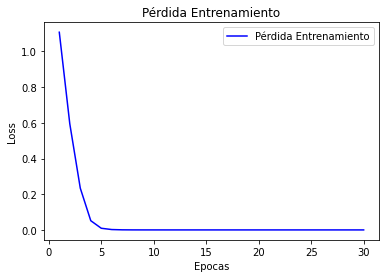

In [22]:
# Se gráfica la evolución de la pérdida durante el entrenamiento
perdida_train = historia.history['loss']
epocas = range(1, len(perdida_train) + 1)

plt.plot(epocas, perdida_train, 'b', label='Pérdida Entrenamiento')
plt.title('Pérdida Entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [14]:
# Se cargan los diferentes archivos  de audio que se van a usar en el proceso
# de testeo y se genera el espectrograma de cada uno de ellos

RutaFile="/content/gdrive/MyDrive/Colab Notebooks/Datos/Comandos/Arriba6.wav"
wave1at = load_wav_16k_mono(RutaFile)
espectrograma1at= preprocess(wave1at)

RutaFile="/content/gdrive/MyDrive/Colab Notebooks/Datos/Comandos/Arriba7.wav"
wave1bt = load_wav_16k_mono(RutaFile)
espectrograma1bt= preprocess(wave1bt)

RutaFile="/content/gdrive/MyDrive/Colab Notebooks/Datos/Comandos/Derecha6.wav"
wave2at = load_wav_16k_mono(RutaFile)
espectrograma2at= preprocess(wave2at)

RutaFile="/content/gdrive/MyDrive/Colab Notebooks/Datos/Comandos/Derecha7.wav"
wave2bt = load_wav_16k_mono(RutaFile)
espectrograma2bt= preprocess(wave2bt)

RutaFile="/content/gdrive/MyDrive/Colab Notebooks/Datos/Comandos/Izquierda6.wav"
wave3at = load_wav_16k_mono(RutaFile)
espectrograma3at= preprocess(wave3at)

RutaFile="/content/gdrive/MyDrive/Colab Notebooks/Datos/Comandos/Izquierda6.wav"
wave3bt = load_wav_16k_mono(RutaFile)
espectrograma3bt= preprocess(wave3bt)

Datost=np.zeros((6,124,129))
Datost[0,:,:]=espectrograma1at
Datost[1,:,:]=espectrograma1bt
Datost[2,:,:]=espectrograma2at
Datost[3,:,:]=espectrograma2bt
Datost[4,:,:]=espectrograma3at
Datost[5,:,:]=espectrograma3bt
print(Datost.shape)
XVal=tf.expand_dims(Datost, axis=3)
print(XVal.shape)

(6, 124, 129)
(6, 124, 129, 1)


In [15]:
# Se definen las etiquetas para la salida del modelo
YValIni=np.zeros((6,1))
for i in range(2):
    YValIni[i]=0

for i in range(2,4):
    YValIni[i]=1

for i in range(4,6):
    YValIni[i]=2   

print(YValIni)
# Se convierten las etiquetas a codificación "one hot" que es la 
# usará el modelo
YVal= keras.utils.to_categorical(YValIni)

print(YVal)

[[0.]
 [0.]
 [1.]
 [1.]
 [2.]
 [2.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [23]:
# Se evalua el modelo con los datos de testeo
modelo.evaluate(XVal, YVal)

1/1 [==============================] - 0s 265ms/step - loss: 0.0136 - accuracy: 1.0000


[0.013551924377679825, 1.0]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

[[2 0 0]
 [0 2 0]
 [0 0 2]]


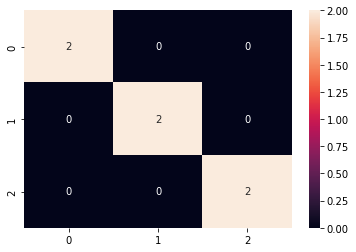

In [24]:
# Se calculan las métricas del modelo con los datos de testeo incluyendo la 
# matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ypredic=modelo.predict(XVal)

y_test_class = np.argmax(YVal,axis=1) 
y_pred_class = np.argmax(ypredic,axis=1) 

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")